### **Let check the frame rate and the number of frame on another match of the 20222 world cup.**

In [2]:
#Loader
import pandas as pd
import matplotlib.pyplot as plt
from kloppy import pff

# paths to data files
roster_path = "/home/student/Documents/AIMS/Intership/pysport/pysport-aims/first_week/data/3812/3812_roster.json"
metadata_path = "/home/student/Documents/AIMS/Intership/pysport/pysport-aims/first_week/data/3812/3812_metadata.json"
raw_data_path = "/home/student/Documents/AIMS/Intership/pysport/pysport-aims/first_week/data/3812/3812.jsonl.bz2"

In [3]:
# Load the dataset for match ID 3812.
dataset = pff.load_tracking(
    raw_data = raw_data_path,
    meta_data = metadata_path,
    roster_meta_data = roster_path,
    coordinates= "pff",
    limit= None,
    sample_rate= None
)

dataset.to_df().head(10)

,period_id,timestamp,frame_id,ball_state,ball_owning_team_id,ball_x,ball_y,ball_z,ball_speed,13228_x,...,8033_d,8033_s,8326_x,8326_y,8326_d,8326_s,8327_x,8327_y,8327_d,8327_s
0,1,0 days 00:00:00,4226,alive,366,2.46,1.58,0.0,None,14.357,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
1,1,0 days 00:00:00.033041,4227,alive,366,2.04,1.62,0.0,None,14.335,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
2,1,0 days 00:00:00.066408,4228,alive,366,1.62,1.67,0.0,None,14.313,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
3,1,0 days 00:00:00.099774,4229,alive,366,1.20,1.71,0.0,None,14.291,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
4,1,0 days 00:00:00.133141,4230,alive,366,0.78,1.76,0.0,None,14.270,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
5,1,0 days 00:00:00.166508,4231,alive,366,0.36,1.80,0.0,None,14.249,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
6,1,0 days 00:00:00.199875,4232,alive,366,-0.07,1.84,0.0,None,14.227,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
7,1,0 days 00:00:00.233241,4233,alive,366,-0.49,1.89,0.0,None,14.206,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
8,1,0 days 00:00:00.266608,4234,alive,366,-0.91,1.93,0.0,None,14.185,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
9,1,0 days 00:00:00.299975,4235,alive,366,-1.33,1.98,0.0,None,14.164,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None


In [4]:
# check the total number of frame the frame_rate and how many minutes of recording it correspond to.
total_Nframes = len(dataset)    # total number of frame
frame_rate = dataset.frame_rate     #frame_rate
# let now get the equivalent number of minutes recorded.
def what_is_this(Nframes,frame_rate=25):
    total_recorded_time  = Nframes/frame_rate
    time_in_min = total_recorded_time/60                # to get the result in minutes
    print(f"This is the record of around {time_in_min:0.2f} min of the 2022 football world cup match {dataset.metadata.teams[0]} vs {dataset.metadata.teams[1]}")
    print(f"Total number of frame availabe: {Nframes}")
    print(f"recording frequency: {frame_rate}Hz")

what_is_this(total_Nframes,frame_rate)

This is the record of around 56.64 min of the 2022 football world cup match Senegal vs Netherlands
Total number of frame availabe: 101851
recording frequency: 29.97Hz


**It seems like is the provider doesn't provide the entire record of the match.</br>**
**But since we haven't yet explore how kloppy parse the data we can't say it confidently.**

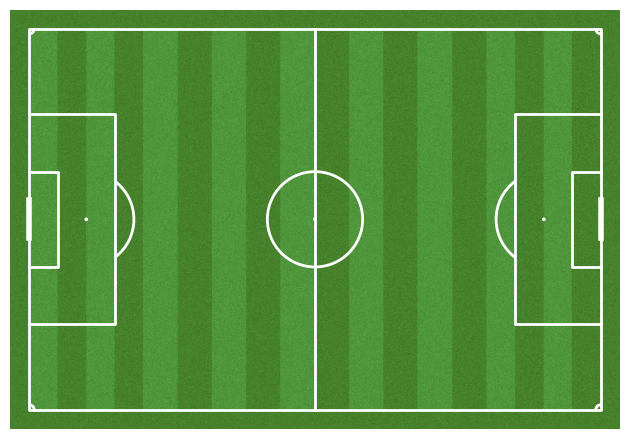

In [ ]:
# Good let be a little bit more curious this time around and plot something good with mplsoccer

# test the if mplsoccer is installed by plotting a pitch as in the documentation.
from mplsoccer.pitch import Pitch
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True,corner_arcs=True)
fig, ax = pitch.draw()

**Good it's works...**

# Now Let try to plot the players on the first frame as a first step.

### What do we need to know ?
- how to plot a pitch and handle parameters of the pitch like the colors of field and lines the size of the figure.
- how to plot player getting from the dataset on the prepared pitch.
- how to render it. 

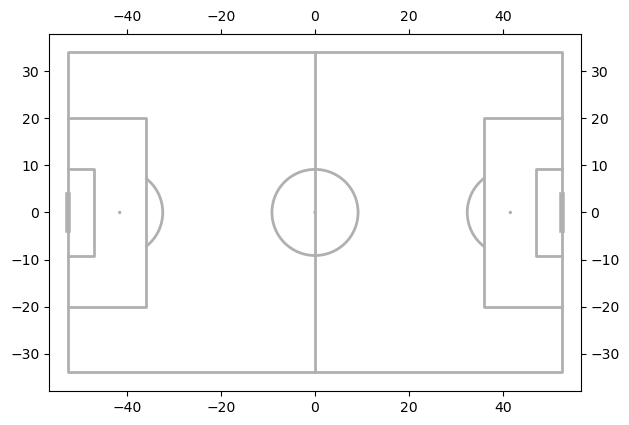

In [ ]:
# To create a pitch we need to create an instance of the Pitch class with some arguments
# the type of pitch that we want wich is related to the name of the data provider 
# here we use "skillcorner" insteed to "pff" since they are using the same nomenclature and skillcorner is among the provider supported by mplsoccer.
# we then precise the dimension of the pitch and some optional attributes like the axis and the label on the axis. 
pitch_ = Pitch(
    pitch_type= "skillcorner",
    pitch_length= dataset.metadata.coordinate_system.pitch_length,
    pitch_width= dataset.metadata.coordinate_system.pitch_width,
    axis= True,
    label= True,
    tick= True
)

fig,axs = pitch_.draw()

In [7]:
# let get the position of the players of the home team in the first frame

# get first the information on the home team

# we define a function that get a team os a specific ground 
def get_team(data,target_ground):
    for team in data.metadata.teams:
        if str(team.ground) == target_ground:
            return team
        
# get the home team     
home_team = get_team(data=dataset,target_ground="home")

# Get the player of a specific team
def get_players_of(data,target_team,frame_number):
    player_list = []
    for player in data.frames[frame_number].players_coordinates.keys():
        if str(player.team.name) == str(target_team.name):
            player_list.append(player)
    return player_list

# get the home team players.
home_team_players = get_players_of(data=dataset,target_team=home_team,frame_number=0)

# Now we can get their positions on the target frame
def get_position(data,list_players,frame_number):
    players_coordinates = {
        "jersey_no":[],
        "player_name":[],
        "x":[],
        "y":[]
    }

    for player in list_players:
        players_coordinates["jersey_no"].append(player.jersey_no)
        players_coordinates["player_name"].append(player.name)
        players_coordinates["x"].append(data.frames[frame_number].players_coordinates[player].x)
        players_coordinates["y"].append(data.frames[frame_number].players_coordinates[player].y)
    return players_coordinates

# get the home players positions
pd.DataFrame(get_position(dataset,home_team_players,0))


,jersey_no,player_name,x,y
0,21,Youssouf Sabaly,14.357,18.306
1,4,Pape Abou Cissé,7.543,4.958
2,16,Edouard Mendy,42.184,-0.469
3,6,Nampalys Mendy,9.501,-1.919
4,22,Abdou Diallo,18.819,-21.928
5,5,Idrissa Gueye,7.011,-8.378
6,15,Krépin Diatta,2.879,11.588
7,18,Ismaïla Sarr,1.351,-22.141
8,8,Cheikhou Kouyaté,18.662,-4.934
9,9,Boulaye Dia,-0.771,-9.960


In [8]:
# good let unify the process to get directly the players position dictionary of a targeted team
def get_position_on_pitch(data, target_ground, frame_number):
    players_coordinates = {
        "jersey_no": [],
        "player_name": [],
        "x": [],
        "y": [],
        "frame_id":" "
    }

    # Identify the team on the target ground
    target_team = None
    for team in data.metadata.teams:
        if str(team.ground) == target_ground:
            target_team = team
            break

    if target_team is None:
        raise ValueError(f"No team found for ground: {target_ground}")

    # Gather player coordinates for the target team on the specified frame
    for player, coord in data.frames[frame_number].players_coordinates.items():
        if str(player.team.name) == str(target_team.name):
            players_coordinates["jersey_no"].append(player.jersey_no)
            players_coordinates["player_name"].append(player.name)
            players_coordinates["x"].append(coord.x)
            players_coordinates["y"].append(coord.y)
            players_coordinates["frame_id"] = data.frames[frame_number].frame_id

    return players_coordinates


In [ ]:
pd.DataFrame(get_position_on_pitch(dataset,"away",1)).set_index("jersey_no").sort_index(ascending=True)

,player_name,x,y,frame_id
jersey_no,,,,
3,Matthijs De Ligt,-22.632,-16.084,4227
4,Virgil van Dijk,-20.304,4.819,4227
5,Nathan Aké,-21.746,14.979,4227
7,Steven Bergwijn,-0.265,8.866,4227
8,Cody Gakpo,1.292,-11.425,4227
11,Steven Berghuis,-11.739,-4.014,4227
17,Daley Blind,-7.989,25.225,4227
18,Vincent Janssen,2.517,1.560,4227
21,Frenkie de Jong,-11.361,1.745,4227


**Good....**

Text(0.5, 0.5, '2022 football world cup: Senegal vs Netherlands')

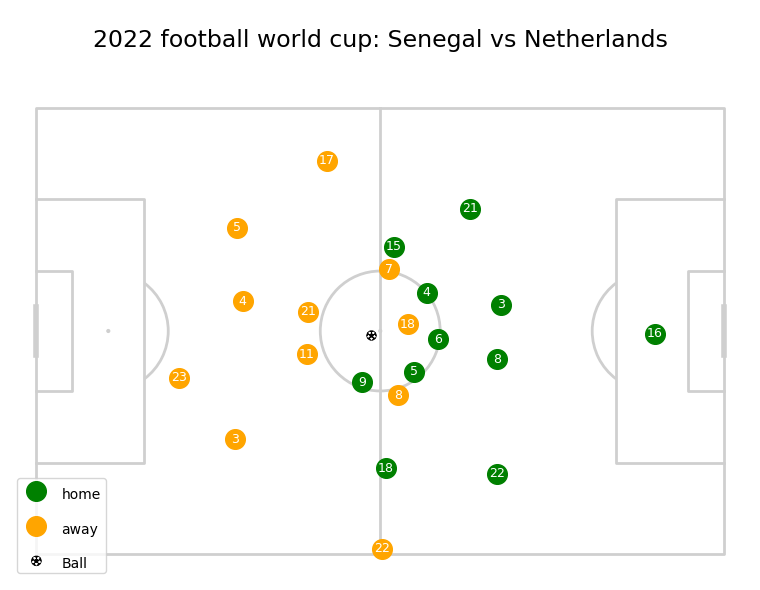

In [ ]:
from mplsoccer import Pitch

# Setup the pitch
pitch = Pitch(
    line_color="#cfcfcf",
    line_zorder=1,
    pitch_type="skillcorner",
    pitch_length=dataset.metadata.coordinate_system.pitch_length,
    pitch_width=dataset.metadata.coordinate_system.pitch_width,
)
fig, axs = pitch.grid(
    figheight=6, endnote_height=0,  # no endnote
    title_height=0.1, title_space=0.02,
    axis=False,
    grid_height=0.83
)

# Get the player coordinates
coordinates_home = pd.DataFrame(get_position_on_pitch(dataset, "home", 30))
coordinates_away = pd.DataFrame(get_position_on_pitch(dataset, "away", 30))

# Plot the player markers (once)
# for the home team
pitch.scatter(
    coordinates_home["x"], coordinates_home["y"],
    s=200, c='green', label='home',
    ax=axs['pitch']
)
# for the away team
pitch.scatter(
    coordinates_away["x"], coordinates_away["y"],
    s=200, c='orange', label='away',
    ax=axs['pitch']
)
# for the ball
pitch.scatter(
    1-dataset.frames[0].ball_coordinates.x, 1-dataset.frames[0].ball_coordinates.y,
    s=50,marker="football", label='Ball',
    ax=axs['pitch']
)

# Plot the jersey numbers (one by one)
for _, player in coordinates_home.iterrows():
    pitch.annotate(
        text=player["jersey_no"],
        xy=(player["x"], player["y"]),
        va='center', ha='center', color='white',
        fontsize=9, ax=axs['pitch']
    )
for _, player in coordinates_away.iterrows():
    pitch.annotate(
        text=player["jersey_no"],
        xy=(player["x"], player["y"]),
        va='center', ha='center', color='white',
        fontsize=9, ax=axs['pitch']
    )

# Add the legend (once)
legend = axs['pitch'].legend(loc='lower left', labelspacing=1.5)
for text in legend.get_texts():
    text.set_fontsize(10)
    text.set_va('center')

# Add a title
axs['title'].text(
    0.5, 0.5,
    f'2022 football world cup: {dataset.metadata.teams[0]} vs {dataset.metadata.teams[1]}',
    va='center', ha='center', color='black', fontsize=17
)


**pretty good...**

In [ ]:
# the orientation is right
dataset.metadata.orientation

away-home

In [ ]:
# let try to change the orientation
dataset.transform(to_orientation="ACTION_EXECUTING_TEAM")
dataset.metadata.orientation

away-home

In [ ]:
# let us try to make the home team playing from the left to the right.
from kloppy.domain import Orientation
dataset.transform(
    to_orientation=Orientation.HOME_AWAY
)
dataset.metadata.orientation

away-home

**Hahaa it is not working ... why ?**

In [ ]:
# let us check the coordinate_system 
dataset.metadata.coordinate_system

# Now Let try to get an animation of the first ten second of the game.

In [ ]:
from matplotlib import animation

In [ ]:
# from what we understood from the mplsoccer documentation to make and animation we need dataframes that contain on a selected duration the positions of the ball, the away players and the home players

# let create these dataframes over a twenty seconds periods so around 600 frames


# first get the 300 first frame of the game 
selected_frames = dataset.frames[:600]

# we define a function to get specific attribute values on multiple frame
def get_values(list_frames):
    data = {"ball_x":[],"ball_y":[]}
    for frame in list_frames:
        data["ball_x"].append(frame.ball_coordinates.x)
        data["ball_y"].append(frame.ball_coordinates.y)
    data["frame_id"] = [frame.frame_id for frame in list_frames]
    return pd.DataFrame(data)

df_ball = get_values(selected_frames)
df_ball

,ball_x,ball_y,frame_id
0,2.46,1.58,4226
1,2.04,1.62,4227
2,1.62,1.67,4228
3,1.20,1.71,4229
4,0.78,1.76,4230
...,...,...,...
595,-17.18,16.99,4821
596,-17.14,16.98,4822
597,-17.10,16.97,4823
598,-17.05,16.97,4824


In [ ]:
away_player_coord_dfs = [pd.DataFrame(get_position_on_pitch(dataset,"away",i)).set_index("jersey_no").sort_index(ascending=True)for i in range(600)]
home_player_coord_dfs = [pd.DataFrame(get_position_on_pitch(dataset,"home",i)).set_index("jersey_no").sort_index(ascending=True)for i in range(600)]

In [ ]:
away_coord_df = pd.concat(away_player_coord_dfs,axis=0,ignore_index=True)
home_coord_df = pd.concat(home_player_coord_dfs,axis=0,ignore_index=True)

In [ ]:
away_coord_df

,player_name,x,y,frame_id
0,Matthijs De Ligt,-22.650,-16.070,4226
1,Virgil van Dijk,-20.279,4.833,4226
2,Nathan Aké,-21.746,14.948,4226
3,Steven Bergwijn,-0.322,8.845,4226
4,Cody Gakpo,1.247,-11.488,4226
...,...,...,...,...
6595,Daley Blind,-7.239,31.940,4825
6596,Vincent Janssen,10.885,-2.008,4825
6597,Frenkie de Jong,-2.187,15.441,4825
6598,Denzel Dumfries,2.554,-31.855,4825


In [ ]:
home_coord_df

,player_name,x,y,frame_id
0,Kalidou Koulibaly,19.462,3.407,4226
1,Pape Abou Cissé,7.543,4.958,4226
2,Idrissa Gueye,7.011,-8.378,4226
3,Nampalys Mendy,9.501,-1.919,4226
4,Cheikhou Kouyaté,18.662,-4.934,4226
...,...,...,...,...
6595,Krépin Diatta,-6.540,19.845,4825
6596,Edouard Mendy,37.746,1.199,4825
6597,Ismaïla Sarr,-5.949,-8.059,4825
6598,Youssouf Sabaly,5.226,23.536,4825


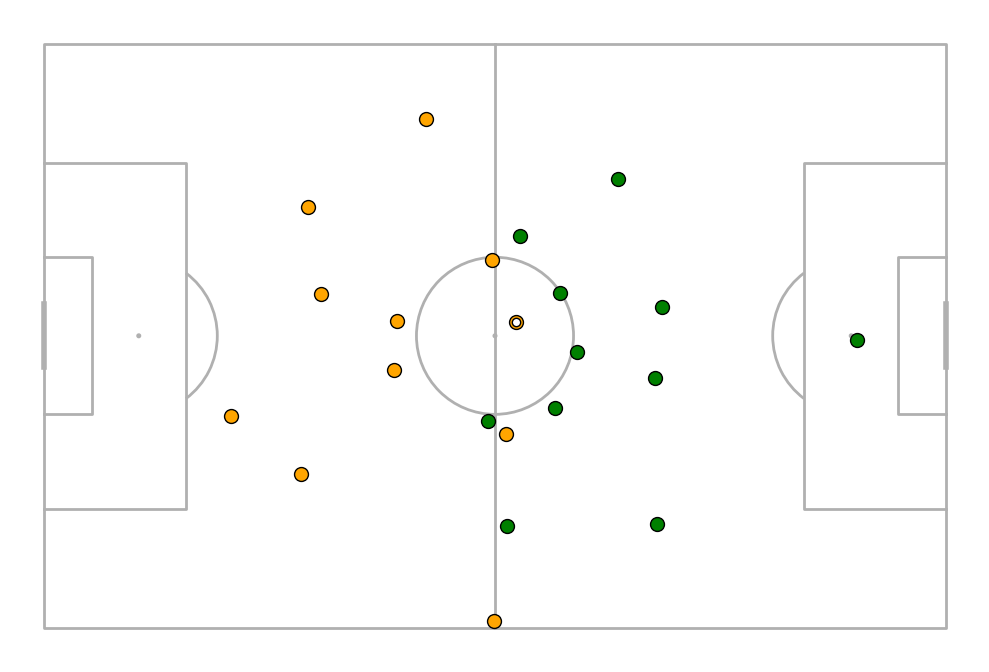

In [ ]:
# First set up the figure, the axis
pitch = Pitch(pitch_type='skillcorner', goal_type='line', pitch_width=68, pitch_length=105)
fig, ax = pitch.draw(figsize=(10, 7.4))

# then setup the pitch plot markers we want to animate
marker_kwargs = {'marker': 'o', 'markeredgecolor': 'black', 'linestyle': 'None'}
ball, = ax.plot([], [], ms=6, markerfacecolor='w', zorder=3, **marker_kwargs)
away, = ax.plot([], [], ms=10, markerfacecolor='orange', **marker_kwargs)  
home, = ax.plot([], [], ms=10, markerfacecolor='green', **marker_kwargs) 

# animation function
def animate(i):
    """ Function to animate the data. Each frame it sets the data for the players and the ball."""
    # set the ball data with the x and y positions for the ith frame
    ball.set_data(df_ball.iloc[i, [0]], df_ball.iloc[i, [1]])
    # get the frame id for the ith frame
    frame = df_ball.iloc[i, 2]
    # set the player data using the frame id
    away.set_data(away_coord_df.loc[away_coord_df.frame_id == frame, 'x'],
                  away_coord_df.loc[away_coord_df.frame_id == frame, 'y'])
    home.set_data(home_coord_df.loc[home_coord_df.frame_id == frame, 'x'],
                  home_coord_df.loc[home_coord_df.frame_id == frame, 'y'])
    return ball, away, home


# call the animator, animate so 25 frames per second
anim = animation.FuncAnimation(fig, animate, frames=len(df_ball), interval=33, blit=True)

plt.show()


In [ ]:
anim.save("animation.mp4", fps=30, extra_args=['-vcodec', 'libx264'])